# 🛳️ Projet Titanic - Kaggle  
## Auteur : Paul Lachaise

Ce notebook contient mon code pour le célèbre **défi Titanic** sur [Kaggle](https://www.kaggle.com/competitions/titanic), qui fait souvent office de projet d'introduction à la data science et au machine learning.

---

## 🗂️ Plan du notebook

### 1.  Présentation du défi Titanic : objectif, données d’entrée et de sortie, analyse des données 
### 2.  Data Preparation & Feature Engineering des données avec Pandas 
### 3.  Modélisation et prédiction avec un modèle de machine learning

---

# 1. Présentation du défi Titanic : objectif, données d’entrée et de sortie, analyse des données

Le but du défi est de **prédire si un passager a survécu ou non au naufrage du Titanic**, à partir de ses caractéristiques (âge, sexe, classe, etc.).

### Données d’entrée :
- `train.csv` : données avec la variable cible `Survived` (0 = non, 1 = oui)
- `test.csv` : mêmes colonnes mais sans `Survived` (à prédire)

### Sortie attendue :
Un fichier CSV avec deux colonnes :
- `PassengerId`
- `Survived` : 0 ou 1 pour chaque passager du test

L’évaluation des soumissions se fait via la **précision des prédictions** sur une partie cachée du dataset de test.

In [55]:
import os
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")


print(f" \nLe dataset est composé de {train_data.shape[0]} lignes (donc {train_data.shape[0]} personnes) et de {train_data.shape[1]} colonnes (soit {train_data.shape[1]} informations).")
display(train_data.head(10))
display(train_data.describe(include='all'))

missing_counts = train_data.isnull().sum()
print(f"\nNombre de valeurs manquantes pour train_data : \n{missing_counts.to_string()}")

missing_counts = test_data.isnull().sum()
print(f"\nNombre de valeurs manquantes test_data : \n{missing_counts.to_string()}")

 
Le dataset est composé de 891 lignes (donc 891 personnes) et de 12 colonnes (soit 12 informations).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



Nombre de valeurs manquantes pour train_data : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2

Nombre de valeurs manquantes test_data : 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0


## Description des variables

| Variable   | Description                                         |
|------------|---------------------------------------------------|
| **PassengerId** | Numéro d'identification du passager |
| **Survived** | Indique si le passager a survécu (0 = non, 1 = oui) |
| **Pclass**   | Classe du billet (1 = 1ère classe, 2 = 2e, 3 = 3e) |
| **Name**     | Nom complet du passager                             |
| **Sex**      | Sexe du passager (male/female)                      |
| **Age**      | Âge du passager (contient des valeurs manquantes)  |
| **SibSp**    | Nombre de frères/sœurs/conjoints à bord             |
| **Parch**    | Nombre de parents/enfants à bord                     |
| **Ticket**   | Numéro du billet                                    |
| **Fare**     | Tarif payé pour le billet                           |
| **Cabin**    | Numéro de cabine (beaucoup de valeurs manquantes)  |
| **Embarked** | Port d’embarquement (C = Cherbourg, Q = Queenstown, S = Southampton) |

## Etude de la survie selon la classe et le sexe du passager

Taux de survie selon la classe et le sexe : 
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447 



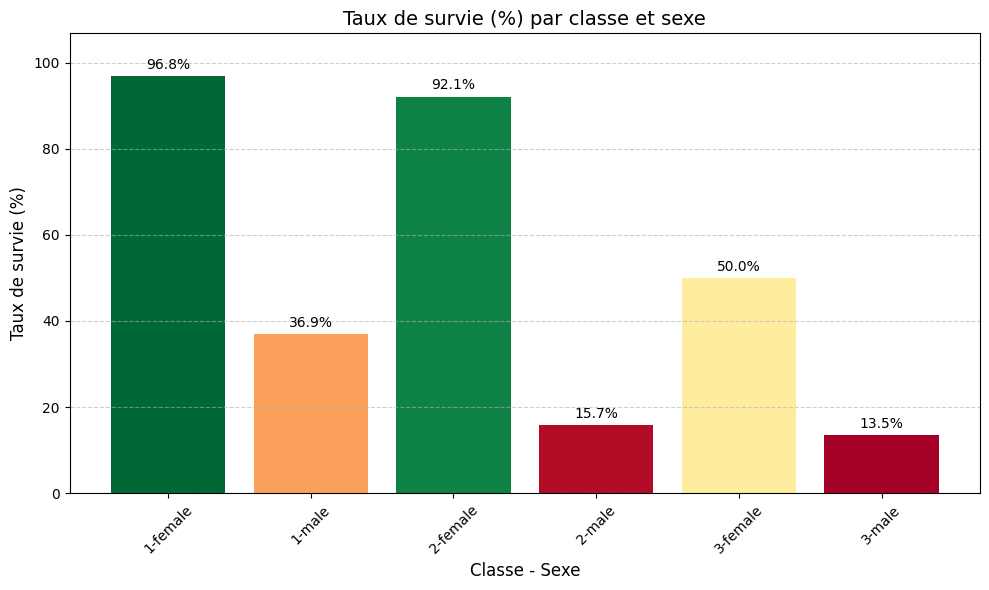

In [56]:
SurvivedStudy = train_data.groupby(['Pclass', 'Sex'])['Survived'].mean()
print(f"Taux de survie selon la classe et le sexe : \n{SurvivedStudy.to_string()} \n")

labels = [f'{pclass}-{sex}' for pclass, sex in SurvivedStudy.index]
values = SurvivedStudy.values * 100  # en %

# Couleurs selon les valeurs
norm = colors.Normalize(vmin=min(values), vmax=max(values))
colormap = cm.RdYlGn
bar_colors = colormap(norm(values))

# Tracé du diagramme en barres
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, values, color=bar_colors)

# Affichage des valeurs au-dessus
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Mise en forme du graphique
ax.set_title("Taux de survie (%) par classe et sexe", fontsize=14)
ax.set_xlabel("Classe - Sexe", fontsize=12)
ax.set_ylabel("Taux de survie (%)", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, max(values) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


On remarque facilement que les meilleurs classes ont plus de chances de survie, de même pour les femmes qui ont globalement un taux de survie bien plus élevé que les hommes.

## Etude du taux de survie selon une tranche d'âge

La personne la plus jeune à bord du Titanic avait 5.0 mois.
La personne la plus âgée à bord du Titanic avait 80.0 ans.


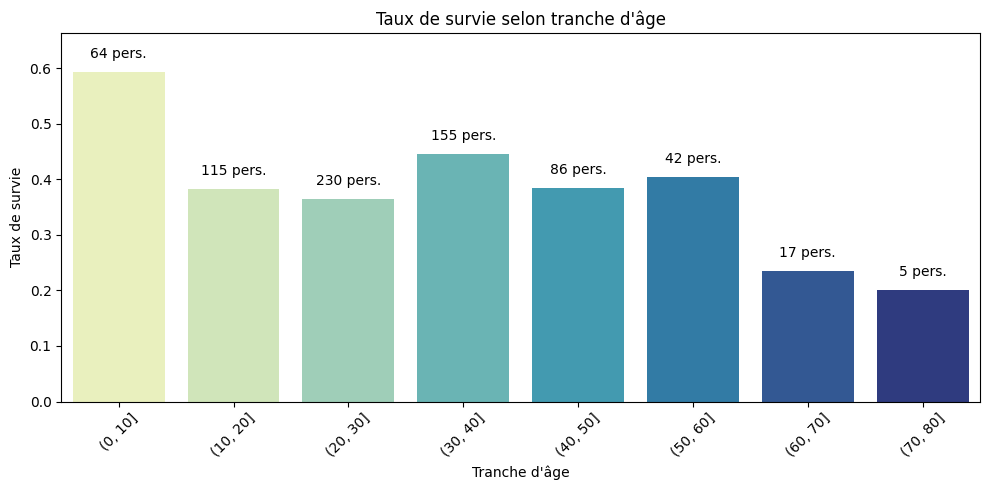

In [57]:
print(f"La personne la plus jeune à bord du Titanic avait {(train_data['Age'].min()*12).round()} mois.")
print(f"La personne la plus âgée à bord du Titanic avait {train_data['Age'].max()} ans.")

age_groups = pd.cut(train_data['Age'], bins=range(0, 81, 10))

# Taux de survie moyen par tranche d'âge
survival_by_age = train_data.groupby(age_groups, observed=False)['Survived'].mean()

# Nombre de personnes par tranche d'âge
count_by_age = train_data.groupby(age_groups, observed=False)['Survived'].count()

# Visualisation
plt.figure(figsize=(10, 5))
bars = sns.barplot(
    x=survival_by_age.index.astype(str),
    y=survival_by_age.values,
    hue=survival_by_age.index.astype(str),
    palette="YlGnBu",
    dodge=False
)

# Ajout du nombre de personnes au-dessus de chaque barre
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    count = count_by_age.iloc[i]
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,
        f'{count} pers.',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Taux de survie selon tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Taux de survie")
plt.xticks(rotation=45)
plt.ylim(0, survival_by_age.max() + 0.07)
plt.tight_layout()
plt.show()

- Les enfants (tranches jeunes) ont un taux de survie plus élevé.  
- Le taux de survie diminue souvent avec l'âge.  

Cela reflète des priorités d'évacuation ou des vulnérabilités différentes selon l'âge.

## Etude du taux de survie selon le port d'embarquement


Taux de survie selon port d'embarquement :
 Embarked
C    0.553571
Q    0.389610
S    0.336957


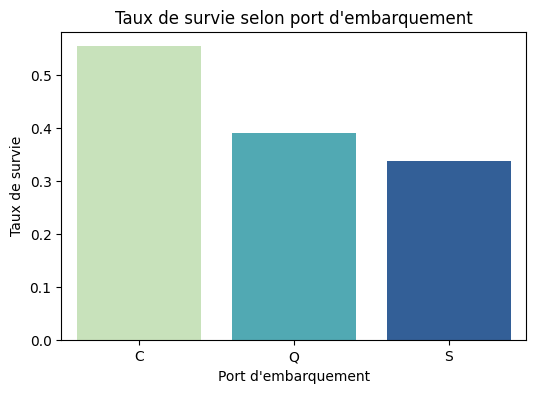

In [58]:
survival_by_embarked = train_data.groupby('Embarked')['Survived'].mean()
print(f"\nTaux de survie selon port d'embarquement :\n {survival_by_embarked.to_string()}")

# Visualisation
plt.figure(figsize=(6,4))
sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, hue=survival_by_embarked.index, palette="YlGnBu", dodge=False)
plt.title("Taux de survie selon port d'embarquement")
plt.xlabel("Port d'embarquement")
plt.ylabel("Taux de survie")
plt.show()

- **Port C (Cherbourg)** : Majoritairement des passagers de 1ère classe, souvent plus riches, avec un taux de survie plus élevé.
- **Port Q (Queenstown)** : Principalement des passagers de 3ème classe, avec un taux de survie plus faible.
- **Port S (Southampton)** : Port principal d'embarquement avec une population mixte (toutes classes). Le taux de survie global est modéré car il combine différents profils.

En résumé, le taux de survie est influencé par la combinaison du port d'embarquement et de la classe sociale, les passagers de ports liés à des classes supérieures ayant globalement plus de chances de survie.


## Etude du tarif median d'un ticket selon la classe et le sexe du passager 

Billet le plus cher : {'Fare': 512.3292, 'Sex': 'female'}
Billet le moins cher : {'Fare': 0.0, 'Sex': 'male'}

Médiane du tarif selon la classe et le sexe : 
Pclass  Sex   
1       female    82.66455
        male      41.26250
2       female    22.00000
        male      13.00000
3       female    12.47500
        male       7.92500 



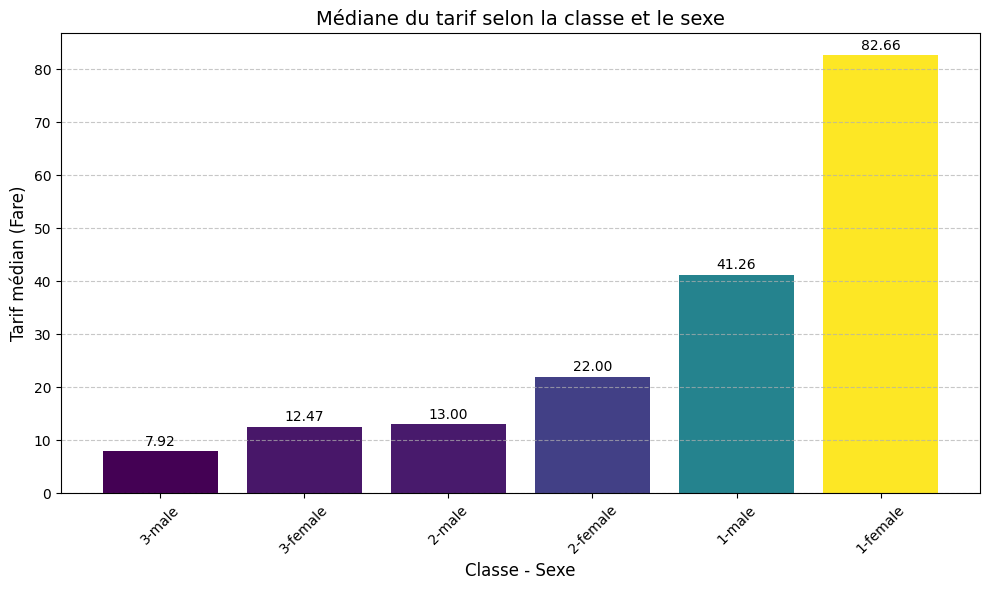

In [59]:
print("Billet le plus cher :", train_data.loc[train_data['Fare'].idxmax(), ['Fare', 'Sex']].to_dict())
print("Billet le moins cher :", train_data.loc[train_data['Fare'].idxmin(), ['Fare', 'Sex']].to_dict())

medianeFare = train_data.groupby(['Pclass', 'Sex'])['Fare'].median()
print(f"\nMédiane du tarif selon la classe et le sexe : \n{medianeFare.to_string()} \n")

# Préparation pour l'affichage
medianFare_sorted = medianeFare.sort_values()
labels = [f'{pclass}-{sex}' for pclass, sex in medianFare_sorted.index]
values = medianFare_sorted.values

# Normalisation selon la valeur du tarif
norm = colors.Normalize(vmin=min(values), vmax=max(values))
colormap = cm.viridis
bar_colors = colormap(norm(values))

# Tracé
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, values, color=bar_colors)

# Ajout d’étiquettes au-dessus des barres
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

ax.set_title("Médiane du tarif selon la classe et le sexe", fontsize=14)
ax.set_xlabel("Classe - Sexe", fontsize=12)
ax.set_ylabel("Tarif médian (Fare)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Les résultats montrent que les femmes ont payé en moyenne des tarifs plus élevés que les hommes. Cela s'explique principalement par une répartition différente des sexes selon les classes de voyage : les femmes sont surreprésentées dans les classes supérieures, où les billets sont plus chers, tandis que les hommes voyagent plus souvent en troisième classe, moins coûteuse. Cette différence de répartition influence donc la moyenne des tarifs payés selon le sexe.

## Etude de l'âge médian selon la classe et le sexe du passager

Médiane selon la classe et le sexe : 
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0 



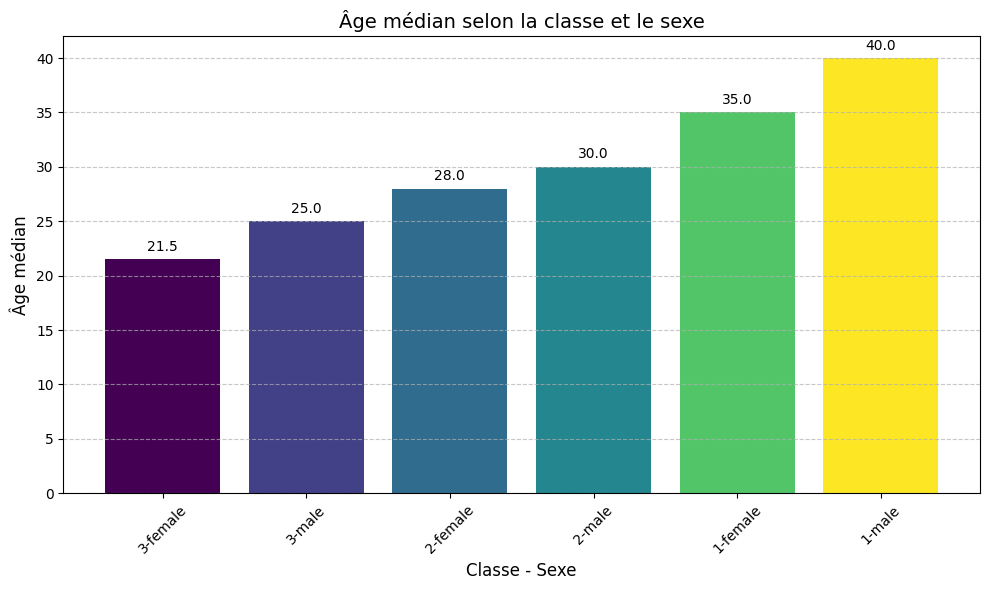

In [60]:
medianeAge = train_data.groupby(['Pclass', 'Sex'])['Age'].median()
print(f"Médiane selon la classe et le sexe : \n{medianeAge.to_string()} \n")

# Préparation pour l'affichage
medianeAge_sorted = medianeAge.sort_values()
labels = [f'{pclass}-{sex}' for pclass, sex in medianeAge_sorted.index]  
values = medianeAge_sorted.values

# Normalisation des couleurs selon l'âge
norm = colors.Normalize(vmin=min(values), vmax=max(values))
colormap = cm.viridis
bar_colors = colormap(norm(values))

# Tracé
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, values, color=bar_colors)

# Ajout d’étiquettes au-dessus des barres
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10)

ax.set_title("Âge médian selon la classe et le sexe", fontsize=14)
ax.set_xlabel("Classe - Sexe", fontsize=12)
ax.set_ylabel("Âge médian", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Etude du port d'embarquement selon la classe du passager

Embarked,C,Q,S
Pclass,,,
1,40%,1%,59%
2,9%,2%,89%
3,13%,15%,72%


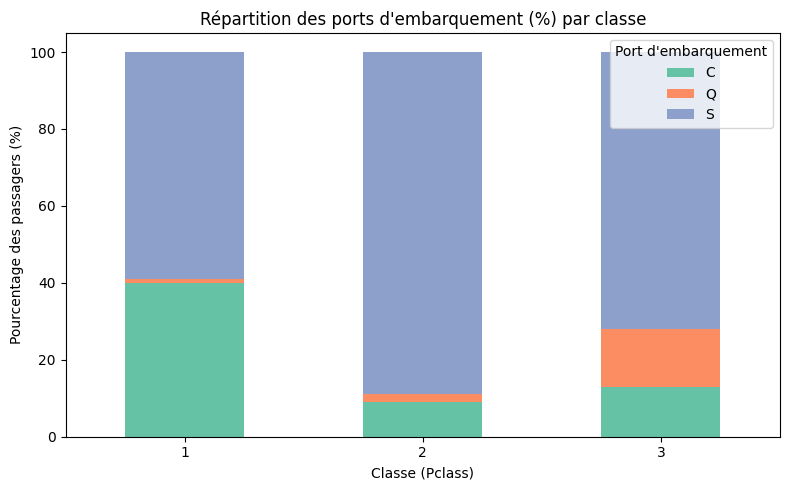

In [61]:
embarked_pct = train_data.groupby('Pclass')['Embarked'].value_counts(normalize=True).unstack().fillna(0) * 100
embarked_pct = embarked_pct.round()
embarked_pct_vis = embarked_pct.round().astype(int).astype(str) + '%'
display(embarked_pct_vis)

# Choix de la colormap
cmap = plt.cm.Set2
colors = [cmap(i) for i in range(len(embarked_pct.columns))]

# Tracé
embarked_pct.plot(kind='bar', stacked=True, color=colors, figsize=(8,5))

plt.title("Répartition des ports d'embarquement (%) par classe")
plt.xlabel("Classe (Pclass)")
plt.ylabel("Pourcentage des passagers (%)")
plt.legend(title="Port d'embarquement", loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## Etude de la corrélation des variables `Age`, `Fare`, `Pclass`, `Survived`

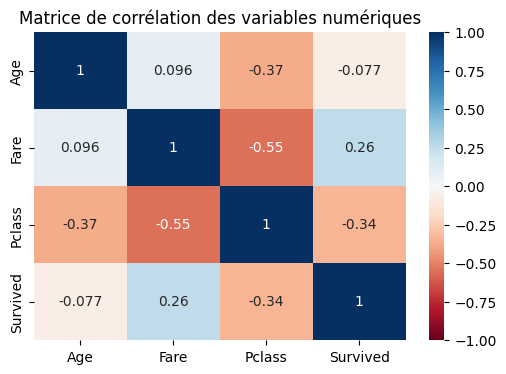

In [62]:
num_vars = ['Age', 'Fare', 'Pclass', 'Survived']

# Calcul de la matrice de corrélation
corr_matrix = train_data[num_vars].corr()

# Visualisation de la matrice avec seaborn
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

#### Signification des coefficients de corrélation

- **1** : corrélation parfaite positive  
  (Quand une variable augmente, l’autre augmente aussi de façon proportionnelle)

- **0** : pas de corrélation linéaire  
  (Pas de lien linéaire évident entre les variables)

- **-1** : corrélation parfaite négative  
  (Quand une variable augmente, l’autre diminue parfaitement)

  
#### Interprétation de la matrice de corrélation du dataset Titanic

- **Survived et Pclass** : corrélation négative modérée ( -0.34)  
  Cela signifie que plus la classe est élevée en valeur (classe 3, la moins chère), moins la survie est probable. Les passagers en 1ère classe (Pclass = 1) ont donc plus de chances de survivre.

- **Survived et Fare** : corrélation positive ( 0.26)  
  Les passagers ayant payé un tarif plus élevé ont plus de chances d’avoir survécu. Cela est cohérent avec l’avantage des classes supérieures.

- **Age et Survived** : corrélation faible ou proche de zéro  
  L’âge n’a pas de lien fort linéaire direct avec la survie dans ce dataset.

- **Pclass et Fare** : forte corrélation négative ( -0.55)  
  Plus la classe est élevée en valeur (classe 3), plus le tarif est bas. La classe 1 correspond à des tarifs élevés, donc on observe une forte relation inverse entre ces deux variables.

- **Age et Fare** ou **Age et Pclass** : corrélations faibles  
  L’âge n’est pas fortement lié ni à la classe ni au tarif payé.

# 2. Data Preparation & Feature Engineering des données avec Pandas
### Pré-traitement des données | pipeline de preprocessing

- **Valeurs manquantes**  
  - *Age* : complété par la médiane selon la classe et le sexe.  
  - *Fare* : complété par la médiane selon la classe et le sexe. (utile pour test_data uniquement)  
  - *Embarked* : complété par la valeur la plus fréquente selon la classe.  
  - *Cabin* : à supprimer car peu pertinent.

- **Encodage des variables catégorielles**  
  - *Sex* : converti en numérique (0 = male, 1 = female).  
  - *Embarked* : transformé en variables indicatrices (one-hot encoding).  
  - *Name* : extraction du titre (Mr, Mrs, Miss, etc.) pour capter un signal social (avec également one-hot encoding).
  
- **Suppression de variables**  
  - *Ticket* et *Name* (après extraction du titre) à supprimer car peu utiles.  
  - *Cabin* est souvent supprimé car peu de pertinence et beaucoup de valeurs manquantes ...

- **Création de variables dérivées**  
  - *FamilySize* = SibSp + Parch + 1 (taille totale de la famille à bord).  
  - *IsAlone* = 1 si FamilySize == 1, sinon 0.

#### Complétion des données manquantes pour `Age`

In [63]:
def Age_completion(row):
    if pd.isnull(row['Age']):
        return medianeAge.loc[row['Pclass'], row['Sex']]
    else:
        return row['Age']

# Appliquer la fonction à chaque ligne
train_data['Age'] = train_data.apply(Age_completion, axis=1)

print(f"Nombre de valeurs manquantes dans 'Age' maintenant : {train_data['Age'].isnull().sum()}")  

Nombre de valeurs manquantes dans 'Age' maintenant : 0


#### Complétion des données manquantes pour `Fare` (utile uniquement pour test_data où il manque une valeur)

In [ ]:
def Fare_completion(row):
    if pd.isnull(row['Fare']):
        return medianeFare.loc[row['Pclass'], row['Sex']]
    else:
        return row['Fare']

# Appliquer la fonction à chaque ligne
train_data['Fare'] = train_data.apply(Fare_completion, axis=1)

print(f"Nombre de valeurs manquantes dans 'Fare' maintenant : {train_data['Fare'].isnull().sum()}") # Pour train_data il y avait déjà 0 valeur manquante

Nombre de valeurs manquantes dans 'Fare' maintenant : 0


#### Complétion des données manquantes pour `Embarked`

In [65]:
# La valeur S est la plus fréquente qu'importe la classe|sexe du passager
train_data['Embarked'] = train_data['Embarked'].fillna('S')

print(f"Nombre de valeurs manquantes dans 'Embarked' maintenant : {train_data['Embarked'].isnull().sum()}")  

Nombre de valeurs manquantes dans 'Embarked' maintenant : 0


#### Convertion numérique du sexe

In [66]:
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


#### Encodage de la variable `Embarked`

La variable `Embarked` contient des catégories (`S`, `C`, `Q`) représentant les ports d'embarquement.

Les algorithmes ne comprennent pas ces valeurs textuelles. On utilise donc le **One-Hot Encoding** pour les transformer en colonnes binaires :

| Embarked | Embarked_S | Embarked_C | Embarked_Q |
|----------|------------|------------|------------|
| S        | 1          | 0          | 0          |
| C        | 0          | 1          | 0          |
| Q        | 0          | 0          | 1          |

- Avec `drop_first=True`, on évite la redondance en supprimant la première modalité (C).
- On crée donc **2 colonnes indicatrices** correspondant aux modalités restantes (Q et S).
- Ces colonnes contiennent des valeurs 0 ou 1 indiquant la présence ou non de la modalité.
- Utiliser deux colonnes indicatrices évite la multicolinéarité, ce qui est important pour la régression afin d'assurer la stabilité et l'interprétabilité du modèle.

In [67]:
def encode_embarked(df):
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)
    embarked_cols = [col for col in df.columns if col.startswith('Embarked_')]
    df[embarked_cols] = df[embarked_cols].astype(int)
    return df

train_data = encode_embarked(train_data)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1


#### Extraction des titres (Mr, Mrs, Miss, etc.) dans `Name`

On extrait le **titre de civilité** puis on le transforme en **variable catégorielle utilisable par un modèle de machine learning**.

En effet, le titre donne des indications précieuses sur la **position sociale**, **l'âge probable** ou le **sexe** d'un passager. 
Par exemple :
- "Master" est souvent utilisé pour les jeunes garçons qui ont beaucoup de chance de survie d'après les études précédentes étant prioritaires dans les évacuations.
- "Mrs", "Miss", "Ms" indiquent des femmes, souvent mariées ou non.
- Des titres rares comme "Dr", "Sir", "Countess" sont liés à des classes sociales élevées ou à des rôles spécifiques.

On utilise une fois de plus le **One-Hot Encoding** pour les transformer en colonnes binaires suite à l'extraction

Ces informations peuvent aider le modèle à mieux prédire la survie.

In [68]:
def extract_and_encode_title(df):
    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
    df['Title'] = df['Title'].replace({
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
        'Lady': 'Rare', 'Countess': 'Rare', 'Dona': 'Rare',
        'Sir': 'Rare', 'Jonkheer': 'Rare', 'Don': 'Rare',
        'Dr': 'Rare', 'Rev': 'Rare', 'Major': 'Rare',
        'Col': 'Rare', 'Capt': 'Rare', 'the Countess' : 'Rare'
    })
    Title_visualization = df['Title'].value_counts().to_string()
    df = pd.get_dummies(df, columns=['Title'], prefix='Title', drop_first=True)
    df = df.astype({col: int for col in df.columns if col.startswith('Title_')})
    return df, Title_visualization

train_data, Title_viz = extract_and_encode_title(train_data)
print(Title_viz)
train_data.head()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,0,1,0,0


#### Suppression des variables peu utiles (`Name`,`Ticket`,`Cabin`)

In [69]:
train_data = train_data.drop(['Name','Ticket', 'Cabin'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,1,22.0,1,0,7.2500,0,1,0,1,0,0
1,2,1,1,0,38.0,1,0,71.2833,0,0,0,0,1,0
2,3,1,3,0,26.0,0,0,7.9250,0,1,1,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,0,1,0,0,1,0
4,5,0,3,1,35.0,0,0,8.0500,0,1,0,1,0,0


#### Création de la variable `FamilySize`

In [70]:
train_data['FamilySize'] = train_data['SibSp'] + train_data ['Parch'] +1    # +1 pour inclure le passager lui-même
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize
0,1,0,3,1,22.0,1,0,7.2500,0,1,0,1,0,0,2
1,2,1,1,0,38.0,1,0,71.2833,0,0,0,0,1,0,2
2,3,1,3,0,26.0,0,0,7.9250,0,1,1,0,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1,0,0,1,0,2
4,5,0,3,1,35.0,0,0,8.0500,0,1,0,1,0,0,1


#### Création de la variable `IsAlone`

In [71]:
train_data['IsAlone'] = ((train_data['FamilySize']) == 1).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,0,1,0,1,0,0,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,0,0,0,1,0,2,0
2,3,1,3,0,26.0,0,0,7.9250,0,1,1,0,0,0,1,1
3,4,1,1,0,35.0,1,0,53.1000,0,1,0,0,1,0,2,0
4,5,0,3,1,35.0,0,0,8.0500,0,1,0,1,0,0,1,1


## 3. Modélisation et prédiction avec un modèle de machine learning

Cette étape consiste à entraîner et évaluer plusieurs modèles de machine learning afin de prédire la variable `Survived` (survie des passagers).

Les étapes sont les suivantes :
- Séparation du jeu de données en un ensemble d’entraînement et un ensemble de test (`train_test_split`).
- Normalisation des données pour certains modèles à l’aide de `StandardScaler`.
- Entraînement de trois modèles :
  - **Régression logistique** : modèle linéaire utilisé avec les données standardisées.
  - **Random Forest** : ensemble d’arbres de décision, performant sur les données brutes.
  - **XGBoost** : algorithme de boosting particulièrement efficace sur les problèmes de classification.

Chaque modèle est évalué avec les métriques `accuracy_score` (taux de bonne classification) et `classification_report` (précision, rappel, F1-score), permettant une comparaison des performances.


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


train_Y = train_data.pop('Survived')
train_X = train_data
print("Y_train:")
display(train_Y.head().to_frame())

print("X_train:")
display(train_X.head())

X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)
print("Régression logistique : ", accuracy_score(y_test, y_pred1))


model2 = RandomForestClassifier(n_estimators=100, random_state=0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("Random Forest : ", accuracy_score(y_test, y_pred2))

model3 = XGBClassifier(eval_metric='logloss')
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print("XGBoost : ", accuracy_score(y_test, y_pred3) , "\n\n")


print("Logistic Regression:\n", classification_report(y_test, y_pred1))
print("Random Forest:\n", classification_report(y_test, y_pred2))
print("XGBoost:\n", classification_report(y_test, y_pred3))

Y_train:


,Survived
0,0
1,1
2,1
3,1
4,0


X_train:


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize,IsAlone
0,1,3,1,22.0,1,0,7.2500,0,1,0,1,0,0,2,0
1,2,1,0,38.0,1,0,71.2833,0,0,0,0,1,0,2,0
2,3,3,0,26.0,0,0,7.9250,0,1,1,0,0,0,1,1
3,4,1,0,35.0,1,0,53.1000,0,1,0,0,1,0,2,0
4,5,3,1,35.0,0,0,8.0500,0,1,0,1,0,0,1,1


Régression logistique :  0.8100558659217877
Random Forest :  0.8547486033519553
XGBoost :  0.8491620111731844 


Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.75      0.77      0.76        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       110
           1       0.88      0.72      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179

XGBoost:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       110
           1       0.85      0.74      0.79        69

    accuracy         

### Choix du modèle final

Parmi les modèles testés (Régression logistique, Random Forest, XGBoost), le **Random Forest** affiche les meilleures performances initiales sans optimisation, avec un bon compromis entre précision, rappel et F1-score.

Nous allons donc nous concentrer sur ce modèle, en commençant par optimiser ses hyperparamètres afin d’améliorer encore ses résultats. 

Une fois cette optimisation réalisée, les prochaines étapes consisteront à préparer les données de test de la même manière que les données d’entraînement, appliquer le modèle Random Forest optimisé, puis sauvegarder les prédictions au format requis pour la soumission au challenge Kaggle.


In [73]:
model_path = "random_forest_optimized.joblib"

# Variable globale pour indiquer si on a déjà le modèle optimisé
try:
    optimized_model_loaded
except NameError:
    optimized_model_loaded = False

if not optimized_model_loaded:
    if os.path.exists(model_path):
        model2_optimized = joblib.load(model_path)
        print("Modèle optimisé chargé depuis le fichier.")
    else:
        from sklearn.model_selection import GridSearchCV
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
        rf = RandomForestClassifier(random_state=0)
        grid_search = GridSearchCV(estimator=rf,
                                   param_grid=param_grid,
                                   cv=5,
                                   n_jobs=-1,
                                   scoring='accuracy',
                                   verbose=1)
        grid_search.fit(X_train, y_train)
        print("Meilleurs paramètres : ", grid_search.best_params_)
        print("Meilleure accuracy CV : {:.4f}".format(grid_search.best_score_))
        model2_optimized = grid_search.best_estimator_
        joblib.dump(model2_optimized, model_path)
        print("Modèle optimisé sauvegardé.")
    optimized_model_loaded = True

# utiliser model2_optimized sans lancer GridSearch
y_pred_optimized = model2_optimized.predict(X_test)
print("Random Forest optimisé accuracy sur test : {:.4f}".format(accuracy_score(y_test, y_pred_optimized)))
print("Classification report :\n", classification_report(y_test, y_pred_optimized))

Random Forest optimisé accuracy sur test : 0.8101
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [74]:
# Préparation des données de test (mêmes transformations que pour l'entraînement)
def prepare_test_data(df):
    df['Age'] = df.apply(lambda row: medianeAge.loc[row['Pclass'], row['Sex']]
                        if pd.isnull(row['Age']) else row['Age'], axis=1)
    df['Fare'] = df.apply(lambda row: medianeFare.loc[row['Pclass'], row['Sex']]
                        if pd.isnull(row['Fare']) else row['Fare'], axis=1)
    df['Embarked'] = df['Embarked'].fillna('G')
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

    df = encode_embarked(df)
    df, title_viz = extract_and_encode_title(df) # title_viz pas utilisée

    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = ((df['FamilySize']) == 1).astype(int)
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

    # Vérifie que les colonnes soient les mêmes que dans train_X
    missing_cols = set(train_X.columns) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    df = df[train_X.columns]
    return df

# Charger les données test
test_prepared = prepare_test_data(test_data)

# Prédictions
predictions = model2_optimized.predict(test_prepared)

# Création du fichier submission
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})

# Sauvegarde
submission.to_csv("/home/paul/Documents/Datacraft/titanic_kaggle/Titanic_Kaggle/data/submission.csv", index=False)
print(f"Fichier file://{os.path.abspath("/home/paul/Documents/Datacraft/titanic_kaggle/Titanic_Kaggle/data/submission.csv")} généré, prêt pour soumission sur Kaggle !") 

Fichier file:///home/paul/Documents/Datacraft/titanic_kaggle/Titanic_Kaggle/data/submission.csv généré, prêt pour soumission sur Kaggle !


Le score obtenu sur la plateforme Kaggle avec ce fichier submission.csv est de **0.77511**, ce qui témoigne de la qualité de notre approche.

# Conclusion du projet Titanic

Dans ce projet, nous avons construit un pipeline de machine learning pour répondre au défi emblématique du Titanic proposé sur Kaggle. Ce challenge a servi de cadre pour explorer les principales étapes d’un workflow de data science appliqué à un problème de classification supervisée.

---

### Récapitulatif des étapes

1. **Compréhension du problème**  
   Le but était de prédire la survie des passagers du Titanic à partir de caractéristiques personnelles (âge, sexe, classe, etc.), en s'appuyant sur un jeu de données fourni par Kaggle.

2. **Exploration des données**  
   - Étude de la distribution des classes (`Survived`).
   - Analyse des variables clés comme `Pclass`, `Sex`, `Age`, et `Embarked`.
   - Visualisations pour détecter les corrélations et comprendre les facteurs influents.

3. **Préparation des données**
   - Gestion des valeurs manquantes (`Age`, `Cabin`, `Embarked`, etc.).
   - Encodage des variables catégorielles (`Sex`, `Embarked`).
   - Création de nouvelles features (e.g., titre extrait du nom, indicateur d’enfant, taille de famille).
   - Mise à l’échelle des variables numériques pour les modèles sensibles aux grandeurs.

4. **Modélisation**
   - Évaluation de plusieurs modèles : Régression Logistique, Random Forest, XGBoost.
   - Sélection du **Random Forest** pour ses performances équilibrées.
   - Optimisation des hyperparamètres avec `GridSearchCV`.

5. **Évaluation et soumission**
   - Prédictions sur l’ensemble test fourni.
   - Génération d’un fichier `submission.csv`.
   - Score final sur Kaggle : **0.77511**.

---

### Pistes d'amélioration

Voici quelques leviers pour aller plus loin :

- Intégrer des techniques d’**ensemblage** (stacking, voting) pour combiner les forces de plusieurs modèles.
- Explorer plus finement la variable `Cabin` ou les noms de famille (effet groupe).
- Implémenter une pipeline automatisée avec `Pipeline` et `ColumnTransformer` de Scikit-learn.

---

Ce projet a permis de parcourir l’ensemble du cycle d’un projet de data science, de la compréhension du problème à la mise en production d’un modèle prédictif.